In [1]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data pre-processing

In [253]:
original_table = pd.read_excel('./artzi.xlsx',header=0,sheet_name=1)

In [254]:
original_table.head()

,מס מועמד,שם מועמד,אתר,שם קלפי,קוד קלפי,"סה""כ קולות"
0,170,שטגמן איילה,אילת,אילת 01,100001,7
1,176,דוידי אלי,אילת,אילת 01,100001,10
2,152,נגוסה אברהם,אילת,אילת 01,100001,2
3,118,גליק יהודה,אילת,אילת 01,100001,28
4,103,אדלשטיין יולי יואל,אילת,אילת 01,100001,110


Translate from Hebrew to English

In [255]:
dict_colnames = {
    'מס מועמד':'candidate_number',
    'שם מועמד': 'candidate_name',
    'אתר': 'city',
    'שם קלפי': 'kalpi_name',
    'קוד קלפי': 'kalpi',
    'סה"כ קולות': 'sum'
}

In [256]:
dict_names = { 'אבבה בגשאו דוד': 'Abeba David',
 'אבבה לווטה ליאור': 'Abeba Lior',
 'אביטן דורון': 'Avitan Doron',
 'אברהם שרה': 'Avraham Sarah',
 'אגמון זיו': 'Agmon Ziv',
 'אדלשטיין יולי יואל': 'Edelstein Yuli',
 'אדם שאול': 'Adam Shaul',
 'אדרי טל': 'Edri Tal',
 'אוחנה אמיר': 'Ohana Amir',
 'אזברגה גומעה': 'Azbera Goma',
 "איז'ק רוני": 'Izak Roni',
 'אילגייב גריגורי': 'Ilgiev Gregory',
 'אילני יאיר': 'Ilani Yair',
 'איפרגן משה': 'Ifargan Moshe',
 'אלבז דויד': 'Elbaz David',
 'אלמגור חגית': 'Almagor Hagit',
 'אלקין זאב': 'Elkin Zeev',
 'אמסלם דוד': 'Amsalem David',
 'אקוניס אופיר': 'Akunis Ofir',
 'אקוניס עומרי': 'Akunis Omri',
 'ארביב אלי (אליעזר)': 'Arviv Eli',
 'ארדן גלעד': 'Erdan Gilad',
 'בוזגלו יגאל': 'Buzaglo Igal',
 'בוקר נאוה': 'Boker Navah',
 'ביטן דוד': 'Bitan David',
 'בן יוסף זאב': 'Ben Yosef Zeev',
 'בן סימון נפתלי': 'Ben Simon Naftali',
 'בן סעדון יעקב': 'Ben Saadon Yaakob',
 'בן עמי מישאל מישל': 'Ben Ami Mishel',
 'בן פנחס יוסף-איל': 'Ben Pinhas Yoseg Eyal',
 'בניטה מרדכי': 'Benita Mordechai',
 'ברק קרן': 'Barak Keren',
 'ברקו ענת': 'Berko Anat',
 'ברקת ניר': 'Barkat Nir',
 'בשארי גדי': 'Bashari Gadi',
 'גבאי יאיר': 'Gabay Yair',
 'גולן מאי': 'Golan May',
 'גלילי איילת': 'Galili Ayelet',
 'גליק יהודה': 'Glick Yehuda',
 'גלנט יואב': 'Galant Yoav',
 'גמליאל גילה': 'Gamliel Gila',
 'דוידי אלי': 'Davidi Eli',
 'דולינסקי בטי': 'Dolinski Betty',
 'דיין עוזי': 'Dayan Uzi',
 'דיכטר אביטל': 'Dichter Avital',
 'דיכטר אברהם ( אבי )': 'Dichter Avi',
 'דיקשטיין צחי': 'Dickstein Tsahi',
 'דלויה פנחס': 'Deloya Pinhas',
 'דנינו שלום': 'Danino Shalom',
 'הייב חסן': 'Hieb Hassan',
 'הירשמן ניר': 'Hirshman Nir',
 'הלוי עמית': 'Halevi Amit',
 'הלוי שוש (שושנה)': 'Halevi Shosh',
 'הנגבי צחי': 'Hanegbi Tsahi',
 'הרמלין דוידי': 'Hermlin Davidi',
 'הרצברג ולדימיר': 'Herzberg Vladimir',
 'הרשקוביץ משה': 'Hershkovic Moshe',
 'השכל שרן': 'Haskel Sharen',
 'ואטורי ניסים': 'Vaturi Nissim',
 'וידר יעקב': 'Vidar Yaakov',
 'זוהר מיקי מכלוף': 'Zohar Mickey',
 'זנדני ישי': 'Zandani Shai',
 'זפרני יהודה': 'Zafarni Yehuda',
 "ח'טיב פייסל": 'Hetayev Faisal',
 'חוטובלי ציפי': 'Hotoveli Tzipi',
 'חזן אורן': 'Hazah Oren',
 'חלבי ראפע': 'Halabi Rafe',
 'חננאל שמעון': 'Hananel Shimon',
 'טוביאנה אופיר': 'Toviana Ofir',
 'טולידנו מימון': 'Tolidano Maimon',
 'טל זהר': 'Tal Zohar',
 'יוגב מטי': 'Yogev Mot',
 'יונה אלעד': 'Yona Elad',
 'יחזקאל אורלי': 'Yehezkel Orli',
 'יעיש זיו זאב': 'Yaish Zeev',
 'יצחקי אסף': 'Itzhaki Asaf',
 'ישי רן': 'Yishai Ran',
 'כהן אלי': 'Cohen Eli',
 "כהן-טנוג'י פרננד": 'Cohen Fernand',
 'כוכבי יוסף יוסי': 'Kohav Yossi',
 'כץ אופיר': 'Katz Ofir',
 'כץ חיים': 'Katz Haim',
 'כץ ישראל': 'Katz Israel',
 'לב מיכאל': 'Lev Michael',
 'לובוביקוב מיכאל': 'Lovovikov Michael',
 'לוין יריב': 'Levin Yariv',
 'מארק אוסנת הילה': 'Mark Osnat',
 'מדמון שלמה': 'Madmon Shlomo',
 'מהרט ווניו גלעד': 'Maharat Gilad',
 'מוזס היידי': 'Moses Heidi',
 'מולא פטין': 'Mula Patin',
 'מוסטפא גיהאד': 'Mustafa Gihad',
 'מועלם יוסף נועם': 'Mualem Noam',
 'מועלם פליסיה פייגל': 'Mualen Feigal',
 'מורלי אריאל': 'Morali Ariel',
 'מזגיני בני': 'Mazgini Benni',
 'מזוז ירון': 'Mazuz Yaron',
 'מזרחי גלעד': 'Mizrahi Gilad',
 'מזרחי סילבה': 'Mizrahi Silva',
 'מינס ארנון': 'Mines Arnon',
 'מלכה אלעד': 'Malka Elad',
 'משה דני': 'Moshe Danni',
 'נאגר יואל': 'Nager Yoel',
 'נאור נפתלי': 'Naor Naftali',
 'נבואני אוסאמה': 'Nevuani Osama',
 'נגוסה אברהם': 'Negosa Avraham',
 'נהון צופיה': 'Nahon Tzofia',
 'סאלח סאלח': 'Salah Salah',
 'סופר אביהו': 'Sofer Avihu',
 'סיסו אלון': 'Siso Alon',
 'סכום כולל': 'Sum',
 'סלע נעם': 'Sela Noam',
 'סער גדעון': 'Saar Gidon',
 'ספדי מנדי': 'Sefadi Mendi',
 'עובדיה יצחק': 'Ovadia Itzhak',
 'עטייה אתי חוה': 'Atia Etti',
 'עידן פנחס': 'Idan Pinhas',
 'עיני חזי': 'Eini Hezi',
 'עשהאל שמעון': 'Asael Shimon',
 'פדידה ניסים': 'Fadida Nissim',
 "פינטו ג'קי": 'Pinto Jacky',
 'פליישמן זאב': 'Fleishman Zeev',
 'פסל משה מושיקו': 'Pasal Moshe',
 'פרחאת עטא': 'Parhat Ata',
 'פרידלמן הינדה': 'Fridelman Hinda',
 'קאידבה סמיר': 'Kaidaba Samir',
 'קאשי רועי': 'Kashi Roei',
 'קדוש גבי': 'Kadosh Gabi',
 'קהת סיני': 'Kahat Sinai',
 'קובייסי אביאל': 'Kobiasi Ariel',
 'קורן נורית': 'Koren Nurit',
 'קיש יואב': 'Kish Yoav',
 'קלנר אריאל': 'Kelner Ariel',
 'קצב ליאור': 'Katzav Lior',
 'קצב נבון': 'Katzav Navon',
 'קרא איוב': 'Kara Iub',
 'קרינאוי עאטף': 'Krinawi Atef',
 'קרעי שלמה': 'Karai Shlomo',
 'רגב מירי (מרים)': 'Regev Miri',
 'ריעני רותם': 'Riani Rotem',
 'שטגמן איילה': 'Shtagman Ayala',
 'שטייניץ יובל': 'Shteinits Yuval',
 'שטרית קטי (קטרין)': 'Shitrti Kathy',
 'שטרן רוני': 'Stern Roni',
 'שטרן שבח': 'Stern Sheveh',
 'שיאן דוד': 'Shian David',
 'שיר מיכל': 'Shir Michal',
 'שראל שמעון': 'Sharel Shimon',
 'שרן דוד': 'Sharen David',
 'תאיה דימה': 'Taya Dima',
 'תוויות שורה': 'Kalpi',
 'תנעמי אוריאל': 'Tanami Uriel'
}

In [257]:
dict_cities = {'אופקים': 'Ofakim',
 'אור יהודה': 'Or Yehuda',
 'אור עקיבא': 'Or Akiva',
 'אילת': 'Eilat',
 'אלקנה': 'Elkana',
 'אפרת': 'Efrat',
 'אריאל': 'Ariel',
 'אשדוד': 'Ashdod',
 'אשקלון': 'Ashkelon',
 'באר יעקב': 'Beer Yaakov',
 'באר שבע': 'Beer Sheva',
 'בית אל': 'Beit El',
 "בית ג'אן": 'Beit Jan',
 'בית נטופה - כעביה': 'Beit Netufa Kaabia',
 'בית שאן': 'Beit Shen',
 'בית שמש': 'Beit Shemeh',
 'בני ברק': 'Bnei Brak',
 'בני עי"ש': 'Bnei Aish',
 'בת ים': 'Bat Yam',
 'גבעת שמואל': 'Givat Shmuel',
 'גבעתיים': 'Givatyim',
 'גדרה': 'Gedera',
 'גוליס': 'Julis',
 'גן יבנה': 'Gan Yavne',
 'דאלית אל כרמל': 'Daliat El Carmel',
 'דימונה': 'Dimona',
 'הוד השרון': 'Hod Hasharon',
 'הרצליה': 'Herzeliya',
 'זיכרון יעקב': 'Zihron Yaakov',
 'חדרה': 'Hedera',
 'חולון': 'Holon',
 'חיפה': 'Haifa',
 'חצור הגלילית': 'Hazor Haglilit',
 'טבריה': 'Tveria',
 'טירת הכרמל': 'Tirat Hacarmel',
 'יבנה': 'Yavneh',
 'יהוד מונוסון': 'Yehud Monson',
 'יוקנעם עילית': 'Yoqneam Ilit',
 'יפיע': 'Iafia',
 'ירוחם': 'Yeruham',
 'ירושלים': 'Jerusalem',
 'ירכא': 'Irka',
 'כיסרא-סמיע': 'Kisra Samia',
 'כפר סבא': 'Kfar Saba',
 'כרמיאל': 'Karmiel',
 'לוד': 'Lod',
 'מ. א גוש עציון תקוע': 'RC Gush Etzion Tkoa',
 'מ. א הר חברון מיתרים': 'RC Har Hevron',
 'מ. א מרום הגליל בר יוחאי': 'RC Merom Hagalil',
 'מ.א באר טוביה-שתולים': 'RC Beer Tuvia',
 'מ.א גוש עציון-אלעזר': 'RC Gush Etzion Elazar',
               'מ.א גלבוע': 'RC Gilboa',
 'מ.א גזר': 'RC Gezer',
 "מ.א חבל מודיעין": 'RC Hevel Modiin',
               'מ.א לב השרון': 'RC Lev Hasharon',
 'מ.א מטה בנימין - מצפה יריחו': 'RC Mitzpe Yeriho',
 'מ.א מטה בנימין נריה': 'RC Mate Binyamin Neria',
 'מ.א מטה בנימין-נווה צוף': 'RC Mate Binyamin Neve Tzuf',
 'מ.א מטה בנימין-שילה': 'RC Mate Binyamin Shilo',
 'מ.א מטה בנימין-שער בנימין': 'Mate Binyamin Shaar Binyamin',
 'מ.א עמק לוד-זיתן': 'RC Emek Lod',
 'מ.א שדות נגב - מעגלים': 'RC Sdot Negev Maagalim',
 'מ.א שומרון - ברכה': 'RC Shomron Bracha',
 'מ.א שומרון - עלי זהב': 'RC Shomron Alei Zahav',
 'מ.א שומרון - שבי שומרון': 'RC Shomron Shavei Shomron',
 'מ.א שפיר-זבדיאל': 'RC Shafir Zebdiel',
 'מ.א. מרחבים-ביטחה': 'RC Merhavim Bitha',
 'מ.א. עמק חפר-אלישיב': 'RC Emer Hefer',
 'מגאר (מראר)': 'Magar',
 'מגדל העמק': 'Migdal Haemek',
 'מודיעין': 'Modiin',
 'מעלה אדומים': 'Maale Edomim',
 'מעלות תרשיחא': 'Maalot Tarhiha',
 'מצפה רמון': 'Mitzpe Ramon',
 'נהריה': 'Naharia',
 'נס ציונה': 'Ness Ziona',
 'נצרת': 'Nazereth',
 'נצרת עלית': 'Nazereth Ilit',
 'נשר': 'Nesher',
 'נתיבות': 'Netivot',
 'נתניה': 'Natanya',
 'עכו': 'Akko',
 'עפולה': 'Afula',
 'ערד': 'Arad',
 'פרדס חנה': 'Pardes Hanah',
 'פתח תקווה': 'Petah Tiqwa',
 'צפת': 'Zefat',
 'קדומים': 'Kdumim',
 'קדימה צורן': 'Kadmia Zoran',
 'קריית ביאליק': 'Kiryat Bialik',
 'קריית ים': 'Kiryat Yam',
 'קריית שמונה': 'Kiryat Shmona',
 'קרית אונו': 'Kiryat Ono',
 'קרית ארבע': 'Kiryat Arba',
 'קרית אתא': 'Kiryat Ata',
 'קרית גת': 'Kiryat Gat',
 'קרית מוצקין': 'Kiryat Motzkin',
 'קרית מלאכי': 'Kiryat Malachi',
 'קרית עקרון': 'Kiryat Ekron',
 'קרני שומרון': 'Karnei Shomron',
 'ראמה': 'Rama',
 'ראש העין': 'Rosh Haain',
 'ראשון לציון': 'Rishon Letzion',
 'רחובות': 'Rehovot',
 'רמלה': 'Ramla',
 'רמת גן': 'Ramat Gan',
 'רמת השרון': 'Ramat Hasharon',
 'רעננה': 'Raanana',
 'שדרות': 'Sderot',
 'שוהם': 'Shoham',
 'שפרעם': 'Shfaram',
 'ת"א': 'Tel Aviv',
 'ת"א דרום': 'Tel Aviv South'}

In [259]:
trans_df = (original_table
            .rename(columns=dict_colnames)
            .assign(city = lambda x: x.city.str.strip().map(dict_cities))
            .assign(candidate_name = lambda x: x.candidate_name.map(dict_names))
            .assign(kalpi = lambda x: x.city + "_" + x.kalpi.map(str))
            .drop(columns=['candidate_number','kalpi_name'])
            .astype(int,errors='ignore')
     )

In [260]:
trans_df.head()

,candidate_name,city,kalpi,sum
0,Shtagman Ayala,Eilat,Eilat_100001,7
1,Davidi Eli,Eilat,Eilat_100001,10
2,Negosa Avraham,Eilat,Eilat_100001,2
3,Glick Yehuda,Eilat,Eilat_100001,28
4,Edelstein Yuli,Eilat,Eilat_100001,110


In [263]:
df = trans_df.pivot(index='kalpi', columns='candidate_name', values='sum')

In [265]:
df.to_csv('artzi_mat.csv')

In [266]:
df = pd.read_csv('artzi_mat.csv')

In [267]:
df.head()

,kalpi,Abeba David,Abeba Lior,Akunis Ofir,Amsalem David,Azbera Goma,Barak Keren,Barkat Nir,Ben Pinhas Yoseg Eyal,Berko Anat,...,Sefadi Mendi,Sela Noam,Shitrti Kathy,Shtagman Ayala,Shteinits Yuval,Taya Dima,Vidar Yaakov,Yogev Mot,Yona Elad,Zohar Mickey
0,Afula_107501,11,3,61,50,2,13,59,0,41,...,5,10,9,5,23,1,10,4,6,49
1,Afula_107502,8,7,59,57,5,21,68,1,37,...,3,6,14,5,46,2,3,3,10,37
2,Afula_107503,10,5,61,52,3,15,70,0,33,...,6,11,17,3,28,3,8,3,8,46
3,Afula_107504,8,3,65,54,3,18,71,0,40,...,6,10,9,0,37,3,6,5,10,39
4,Akko_102401,2,1,31,48,0,26,62,1,30,...,0,1,17,2,26,2,0,4,4,54


In [268]:
df.set_index('kalpi', inplace=True)

In [269]:
df.head()

,Abeba David,Abeba Lior,Akunis Ofir,Amsalem David,Azbera Goma,Barak Keren,Barkat Nir,Ben Pinhas Yoseg Eyal,Berko Anat,Bitan David,...,Sefadi Mendi,Sela Noam,Shitrti Kathy,Shtagman Ayala,Shteinits Yuval,Taya Dima,Vidar Yaakov,Yogev Mot,Yona Elad,Zohar Mickey
kalpi,,,,,,,,,,,,,,,,,,,,,
Afula_107501,11,3,61,50,2,13,59,0,41,44,...,5,10,9,5,23,1,10,4,6,49
Afula_107502,8,7,59,57,5,21,68,1,37,51,...,3,6,14,5,46,2,3,3,10,37
Afula_107503,10,5,61,52,3,15,70,0,33,45,...,6,11,17,3,28,3,8,3,8,46
Afula_107504,8,3,65,54,3,18,71,0,40,52,...,6,10,9,0,37,3,6,5,10,39
Akko_102401,2,1,31,48,0,26,62,1,30,29,...,0,1,17,2,26,2,0,4,4,54


Reordering the columns by total number of votes in a descending order 

In [274]:
sdf = df.reindex(df.sum().sort_values(ascending=False).index, axis=1)

In [275]:
sdf.head()

,Edelstein Yuli,Katz Israel,Erdan Gilad,Saar Gidon,Regev Miri,Levin Yariv,Galant Yoav,Barkat Nir,Gamliel Gila,Dichter Avi,...,Fridelman Hinda,Fadida Nissim,Krinawi Atef,Maharat Gilad,Pinto Jacky,Halabi Rafe,Ilgiev Gregory,Cohen Fernand,Halevi Shosh,Ben Pinhas Yoseg Eyal
kalpi,,,,,,,,,,,,,,,,,,,,,
Afula_107501,70,70,93,59,92,74,76,59,76,75,...,1,6,0,0,2,3,0,2,0,0
Afula_107502,65,74,97,59,83,76,76,68,76,79,...,1,4,0,3,0,2,2,1,0,1
Afula_107503,72,75,81,49,85,78,79,70,71,70,...,2,6,0,0,0,1,1,2,0,0
Afula_107504,60,81,99,57,92,84,67,71,68,80,...,1,8,1,1,3,0,0,0,0,0
Akko_102401,43,64,93,74,93,63,61,62,60,68,...,1,3,0,2,0,0,3,1,0,1


Calculating Pearson correlation between candidates

In [278]:
threshold = 45 # choosing the top 45 candidates
tf = sdf[sdf.columns[:threshold]]
rf = tf.copy()
rf =rf.div(rf.sum(axis=1),axis=0)# otherwise everyone just correlates with population, so we would like to normalize by kalpi size
cf = rf.corr()
cf = cf - np.identity(threshold) # zero out the ones to allow getting a nice matplot or something

In [279]:
cf.head()

,Edelstein Yuli,Katz Israel,Erdan Gilad,Saar Gidon,Regev Miri,Levin Yariv,Galant Yoav,Barkat Nir,Gamliel Gila,Dichter Avi,...,Pasal Moshe,Mark Osnat,Malka Elad,Davidi Eli,Sela Noam,Yogev Mot,Dichter Avital,Taya Dima,Yona Elad,Parhat Ata
Edelstein Yuli,0.000000,-0.197594,-0.260887,0.356972,-0.129506,-0.170910,-0.237178,-0.066223,-0.206437,-0.466135,...,0.109835,0.111059,0.224400,-0.338234,0.153071,-0.173445,-0.144277,0.024334,-0.139238,0.061465
Katz Israel,-0.197594,0.000000,0.194443,-0.267611,0.225904,0.129207,0.088247,0.049893,0.204740,0.049738,...,-0.103905,-0.205369,-0.145472,-0.012557,-0.281628,-0.039469,0.003370,-0.066780,-0.205704,0.014649
Erdan Gilad,-0.260887,0.194443,0.000000,-0.138999,0.486898,0.397249,0.458061,-0.302509,0.193093,0.182857,...,-0.054305,-0.064849,-0.374293,-0.047708,-0.012329,-0.238112,-0.022956,-0.346378,0.080337,0.009138
Saar Gidon,0.356972,-0.267611,-0.138999,0.000000,0.057276,-0.212266,-0.272060,0.050479,-0.288680,-0.135698,...,0.359232,-0.029287,-0.088323,-0.171240,0.100544,-0.087824,0.025171,-0.109064,-0.069511,-0.028424
Regev Miri,-0.129506,0.225904,0.486898,0.057276,0.000000,0.243980,0.222429,-0.225210,-0.278431,0.027873,...,0.208272,0.013417,-0.362706,-0.206567,0.079640,-0.167872,0.038139,-0.414472,0.061966,-0.005138


In [284]:
links = cf.stack().reset_index()
links.columns = ['var1', 'var2','value']

nlinks = links[(links.var1 < links.var2)]

In [285]:
nlinks.head()

,var1,var2,value
1,Edelstein Yuli,Katz Israel,-0.197594
2,Edelstein Yuli,Erdan Gilad,-0.260887
3,Edelstein Yuli,Saar Gidon,0.356972
4,Edelstein Yuli,Regev Miri,-0.129506
5,Edelstein Yuli,Levin Yariv,-0.170910


C:\Users\diklag.WISMAIN\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


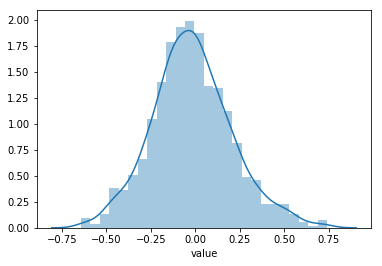

In [286]:
sns.distplot(nlinks.value)

In [287]:
nlinks.value.quantile(np.linspace(0.5,1,21))

0.500   -0.027769
0.525   -0.013865
0.550   -0.004677
0.575    0.012655
0.600    0.022786
0.625    0.033358
0.650    0.048217
0.675    0.063489
0.700    0.086813
0.725    0.103568
0.750    0.115234
0.775    0.129577
0.800    0.160995
0.825    0.180141
0.850    0.205049
0.875    0.232964
0.900    0.264124
0.925    0.318537
0.950    0.372381
0.975    0.481859
1.000    0.741781
Name: value, dtype: float64

We can see that half of the pairs have correlation score higher than -0.027769
We would like to cut weak connections, so we will pick pairs with correlation score higher than the 70th percentile (=0.086813) for example

In [288]:
nlinks = nlinks[(nlinks.value >= nlinks.value.quantile(0.7))]

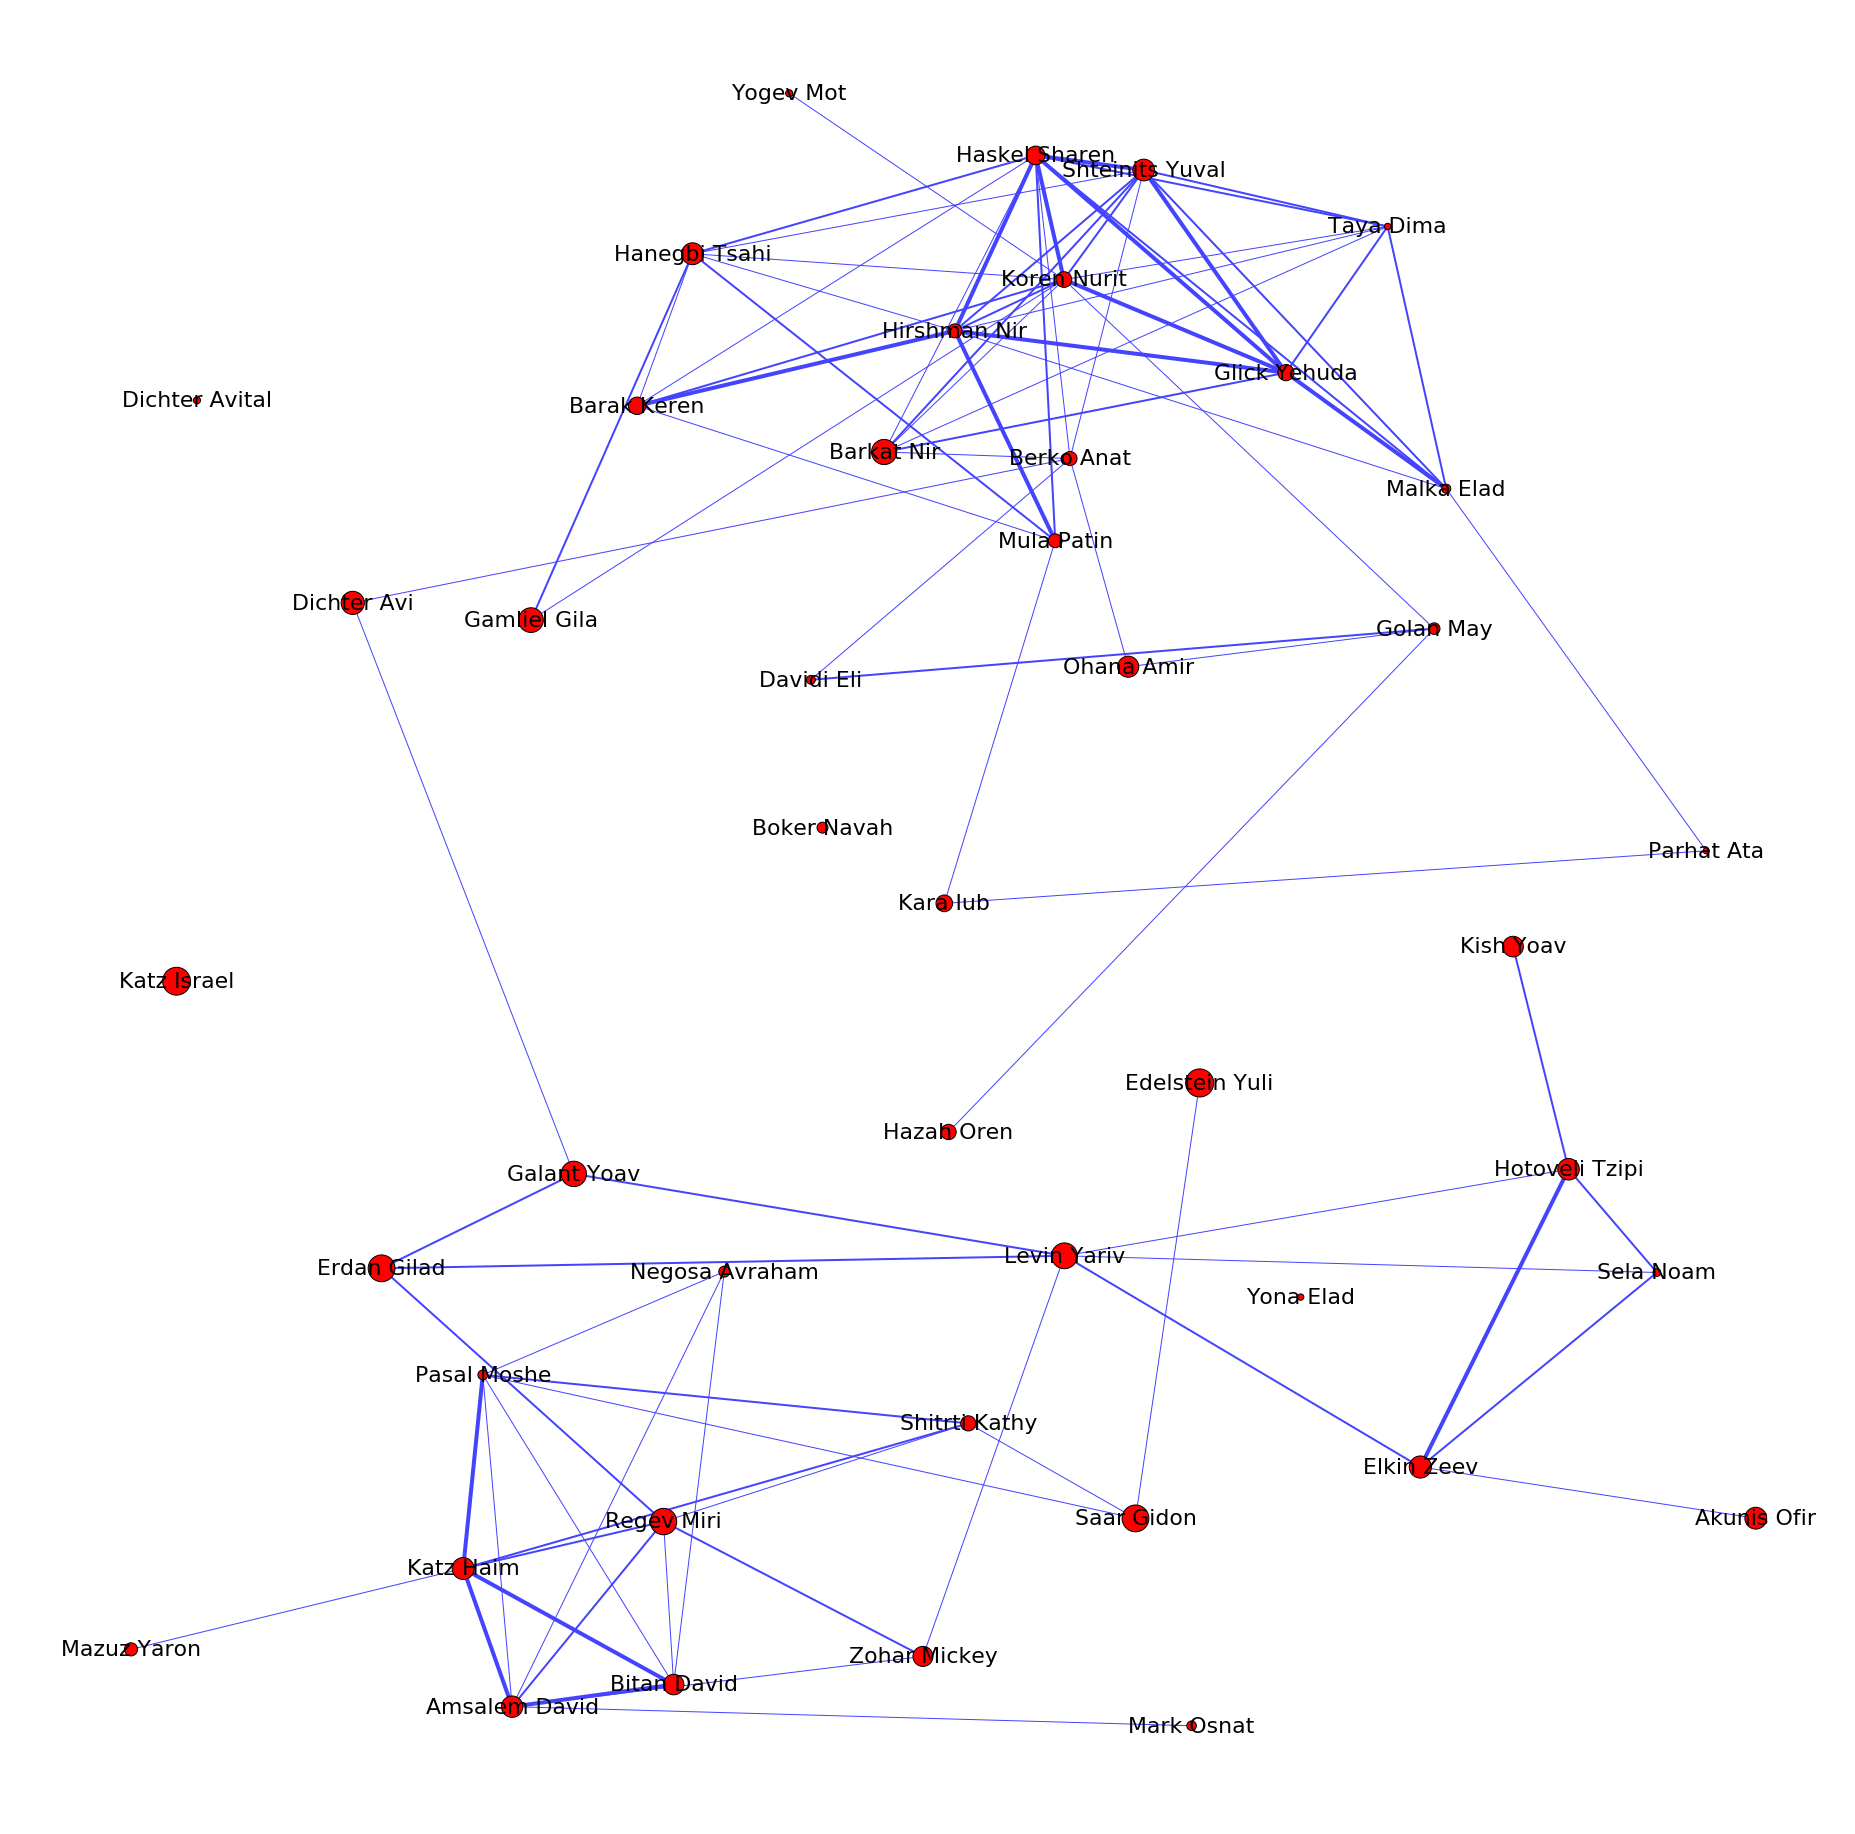

<Figure size 432x288 with 0 Axes>

In [289]:
G = nx.Graph()

for col in tf.columns:
    G.add_node(col, nodesize=tf[col].sum())
    
for index, row in nlinks.iterrows():
    G.add_weighted_edges_from([(row['var1'], row['var2'], row['value'])])

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#4444ff',
    'with_labels': True,
    'font_weight': 'regular',
    'font_size': 22,
}

sizes = [G.node[node]['nodesize']/50 for node in G]
widths = [0 if G.edges[edge]['weight'] < nlinks.value.quantile(0.7) else 4 if G.edges[edge]['weight'] > nlinks.value.quantile(0.95) else 2 if G.edges[edge]['weight'] > nlinks.value.quantile(0.85) else 1 for edge in G.edges]
nx.draw(G, node_size=sizes, width= widths,pos=nx.spring_layout(G, k=5, iterations=1000),**options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000") 
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("nx.png")

Calculating Pearson correlation between polling stations ("kalpies")

In [290]:
trans_df_cities = (original_table
            .rename(columns=dict_colnames)
            .assign(city = lambda x: x.city.str.strip().map(dict_cities))
            .assign(candidate_name = lambda x: x.candidate_name.map(dict_names))
            .drop(columns=['candidate_number','kalpi_name'])
            .astype(int,errors='ignore')
     )
df_cities = trans_df_cities.groupby(['city','candidate_name'])[['sum']].agg('sum').stack().reset_index()
df_cities = df_cities.pivot(index='city', columns='candidate_name', values=0)

In [291]:
del df_cities.columns.name
del df_cities.index.name
df_cities

,Abeba David,Abeba Lior,Akunis Ofir,Amsalem David,Azbera Goma,Barak Keren,Barkat Nir,Ben Pinhas Yoseg Eyal,Berko Anat,Bitan David,...,Sefadi Mendi,Sela Noam,Shitrti Kathy,Shtagman Ayala,Shteinits Yuval,Taya Dima,Vidar Yaakov,Yogev Mot,Yona Elad,Zohar Mickey
Afula,37,18,246,213,13,67,268,1,151,192,...,20,37,49,13,134,9,27,15,34,171
Akko,5,2,83,135,0,64,174,1,102,73,...,0,6,39,3,73,3,2,7,14,151
Arad,9,6,77,111,12,42,166,0,41,106,...,4,10,97,1,102,6,5,4,21,105
Ariel,5,7,209,67,5,68,289,0,104,54,...,4,44,127,1,136,21,31,13,6,153
Ashdod,47,33,485,886,31,250,834,9,187,773,...,6,36,402,13,908,34,20,91,24,446
Ashkelon,24,26,341,543,2,313,584,2,130,308,...,4,14,85,16,298,11,15,32,35,524
Bat Yam,36,24,242,233,8,138,209,1,145,267,...,83,8,41,18,274,38,18,10,91,306
Beer Sheva,26,10,351,423,6,268,556,6,224,392,...,14,54,273,14,410,47,27,107,16,408
Beer Yaakov,6,2,108,88,18,49,122,1,42,114,...,0,3,60,3,144,4,1,3,3,124
Beit El,1,0,69,18,0,0,40,0,10,15,...,2,47,77,0,32,2,5,1,2,91


In [293]:
rf_kalpi = df_cities.copy()
rf_kalpi =rf_kalpi.div(rf.sum(axis=0),axis=1) # otherwise everyone just correlates with population, so we would like to normalize by kalpi size
corr_kalpi = rf_kalpi.transpose().corr()
corr_kalpi = corr_kalpi - np.identity(corr_kalpi.shape[0]) # zero out the ones to allow getting a nice matplot or something

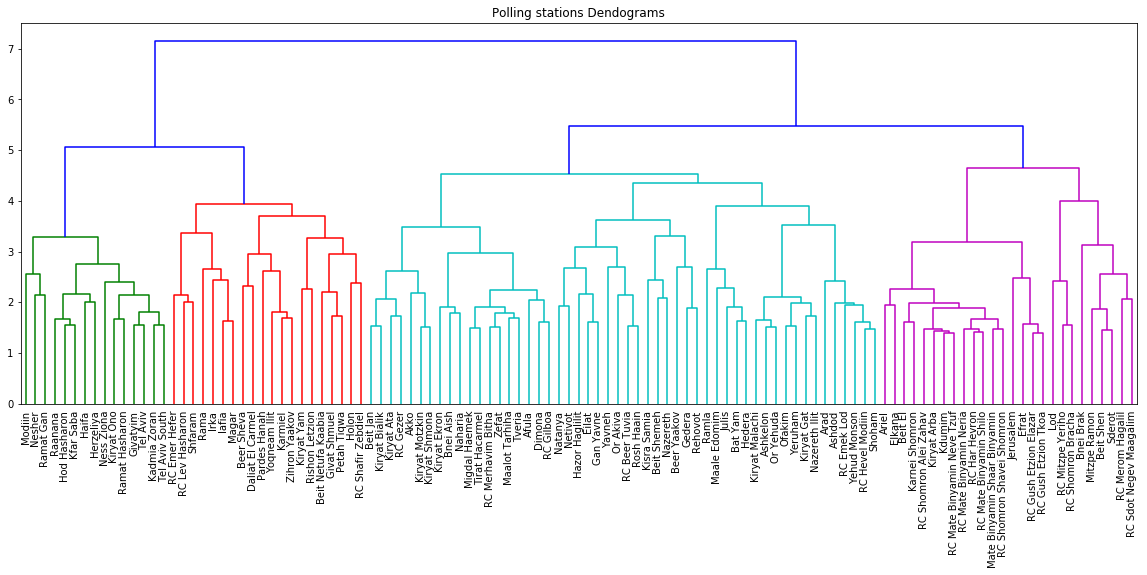

In [294]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 7))  
plt.title("Polling stations Dendograms")  
links_city = shc.linkage(corr_kalpi, method='complete')
dend = shc.dendrogram(links_city,labels=corr_kalpi.index,leaf_font_size = 10)  